<a href="https://colab.research.google.com/github/PHAMTHUYDUYEN/Customer-Segmentation-with-RFM-Analysis-Python/blob/main/K27_Pham_Thuy_Duyen_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. IMPORT DATA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path = '/content/drive/MyDrive'

segmentation = pd.read_csv(path+"segmentation.csv", encoding = 'utf-8')
ecommerce = pd.read_csv(path+"ecommerce-retail1.csv", encoding = 'utf-8')

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrivesegmentation.csv'

In [ ]:
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


# **II. EDA**

## II.1. Missing Values

In [ ]:
print(ecommerce.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [ ]:
print(ecommerce.isna().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


## II.2. Duplicates

In [ ]:
# Check duplicates in general
print(ecommerce.shape)
print(ecommerce.nunique())

(541909, 8)
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [ ]:
# Check duplicates in details
ecommerce[ecommerce.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


## II.3. Data Types

In [ ]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
ecommerce['InvoiceDate']= pd.to_datetime(ecommerce['InvoiceDate'])
print(ecommerce.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


## II.4. Data Values

In [ ]:
ecommerce.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
ecommerce[(ecommerce["UnitPrice"]<=0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [ ]:
ecommerce[(ecommerce["Quantity"]<=0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
# Remove non-delivered invoices
filter = ecommerce[(ecommerce['Quantity'] <= 0) | (ecommerce['UnitPrice'] <= 0)].index
ecommerce.drop(filter, inplace=True)
ecommerce.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


## II.5. EDA Summary

1. Missing Values \
1454 rows in Description -> No base to fill in -> No action \
135080 rows in CustomerID -> No base to fill in -> No action \

2. Duplicates \
All columns have duplicates -> Table have no PK (Because 1 invoice having many purchased items, each line represents 1 item) -> No action

3. Data Type \
InvoiceDate object -> datetime

4. Data Values \
Quantity < 0 -> Cancelled invoices -> Remove \
UnitPrice < 0 -> Assumption:Error -> Remove

# **III. RFM CALCULATION**

## III.1. Calculate R

In [ ]:
# Find last purchase date of each customer
calculation = ecommerce.groupby("CustomerID").agg({"InvoiceDate":"max"})

# Calculate number of days from last purchase
from datetime import datetime
calculation["CurrentDate"] = datetime(2011, 12, 31)
calculation["Recency"] = calculation["InvoiceDate"] - calculation["CurrentDate"]
calculation.head()

,InvoiceDate,CurrentDate,Recency
CustomerID,,,
12346.0,2011-01-18 10:01:00,2011-12-31,-347 days +10:01:00
12347.0,2011-12-07 15:52:00,2011-12-31,-24 days +15:52:00
12348.0,2011-09-25 13:13:00,2011-12-31,-97 days +13:13:00
12349.0,2011-11-21 09:51:00,2011-12-31,-40 days +09:51:00
12350.0,2011-02-02 16:01:00,2011-12-31,-332 days +16:01:00


## III.2. Calculate F

In [ ]:
# Find total purchase invoices per customer
calculation["Frequency"] = ecommerce.groupby("CustomerID")["InvoiceNo"].nunique()
calculation.head()

,InvoiceDate,CurrentDate,Recency,Frequency
CustomerID,,,,
12346.0,2011-01-18 10:01:00,2011-12-31,-347 days +10:01:00,1
12347.0,2011-12-07 15:52:00,2011-12-31,-24 days +15:52:00,7
12348.0,2011-09-25 13:13:00,2011-12-31,-97 days +13:13:00,4
12349.0,2011-11-21 09:51:00,2011-12-31,-40 days +09:51:00,1
12350.0,2011-02-02 16:01:00,2011-12-31,-332 days +16:01:00,1


## III.3. Calculate M

In [ ]:
# Calculate line total of each item in each invoice
ecommerce["LineTotal"] = ecommerce["Quantity"]*ecommerce["UnitPrice"]

# Calculate total purchase value per customer
calculation["Monetary"] = ecommerce.groupby("CustomerID")["LineTotal"].sum()
calculation.head()

,InvoiceDate,CurrentDate,Recency,Frequency,Monetary
CustomerID,,,,,
12346.0,2011-01-18 10:01:00,2011-12-31,-347 days +10:01:00,1,77183.60
12347.0,2011-12-07 15:52:00,2011-12-31,-24 days +15:52:00,7,4310.00
12348.0,2011-09-25 13:13:00,2011-12-31,-97 days +13:13:00,4,1797.24
12349.0,2011-11-21 09:51:00,2011-12-31,-40 days +09:51:00,1,1757.55
12350.0,2011-02-02 16:01:00,2011-12-31,-332 days +16:01:00,1,334.40


# **IV. RANKING**

In [ ]:
# Rank order of data to define cut point
orderFrequency = calculation["Frequency"].rank(method='first')

# Scoring R-F-M
calculation["F_score"] = pd.qcut(orderFrequency, 5, labels=["1", "2", "3", "4", "5"])
calculation[["R_score", "M_score"]] = calculation[["Recency", "Monetary"]].apply(lambda x: pd.qcut(x, 5, labels=["1", "2", "3", "4", "5"]))

# Concat R-F-M score
calculation["RFM_score"] = calculation.apply(lambda x:'%s%s%s' % (x["R_score"],x["F_score"],x["M_score"]),axis=1)
calculation["RFM_score"] = calculation["RFM_score"].astype(int)

calculation = calculation.reset_index()
calculation.head()

,CustomerID,InvoiceDate,CurrentDate,Recency,Frequency,Monetary,F_score,R_score,M_score,RFM_score
0,12346.0,2011-01-18 10:01:00,2011-12-31,-347 days +10:01:00,1,77183.60,1,1,5,115
1,12347.0,2011-12-07 15:52:00,2011-12-31,-24 days +15:52:00,7,4310.00,5,5,5,555
2,12348.0,2011-09-25 13:13:00,2011-12-31,-97 days +13:13:00,4,1797.24,4,2,4,244
3,12349.0,2011-11-21 09:51:00,2011-12-31,-40 days +09:51:00,1,1757.55,1,4,4,414
4,12350.0,2011-02-02 16:01:00,2011-12-31,-332 days +16:01:00,1,334.40,1,1,2,112


# **V. SEGMENTATION**

In [ ]:
# Convert comma-separated string to a list of RFM scores
segmentation["RFM Score"] = segmentation["RFM Score"].str.split(",")

In [ ]:
# Transform each element of a list-like to a row
segmentation = segmentation.explode("RFM Score").reset_index(drop=True)
segmentation["RFM Score"] = segmentation["RFM Score"].astype(int)

In [ ]:
# Merge segmentation with calculation df to show Segment name
rfm = calculation.merge(segmentation, how="left", left_on="RFM_score", right_on="RFM Score")
rfm.head()

,CustomerID,InvoiceDate,CurrentDate,Recency,Frequency,Monetary,F_score,R_score,M_score,RFM_score,Segment,RFM Score
0,12346.0,2011-01-18 10:01:00,2011-12-31,-347 days +10:01:00,1,77183.60,1,1,5,115,Cannot Lose Them,115
1,12347.0,2011-12-07 15:52:00,2011-12-31,-24 days +15:52:00,7,4310.00,5,5,5,555,Champions,555
2,12348.0,2011-09-25 13:13:00,2011-12-31,-97 days +13:13:00,4,1797.24,4,2,4,244,At Risk,244
3,12349.0,2011-11-21 09:51:00,2011-12-31,-40 days +09:51:00,1,1757.55,1,4,4,414,Promising,414
4,12350.0,2011-02-02 16:01:00,2011-12-31,-332 days +16:01:00,1,334.40,1,1,2,112,Lost customers,112


# **VI. VISUALIZATION**

## VI.1. Distribution of R,F,M

<ipython-input-22-2cd74f1f113b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])
<ipython-input-22-2cd74f1f113b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])
<ipython-input-22-2cd74f1f113b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seabo

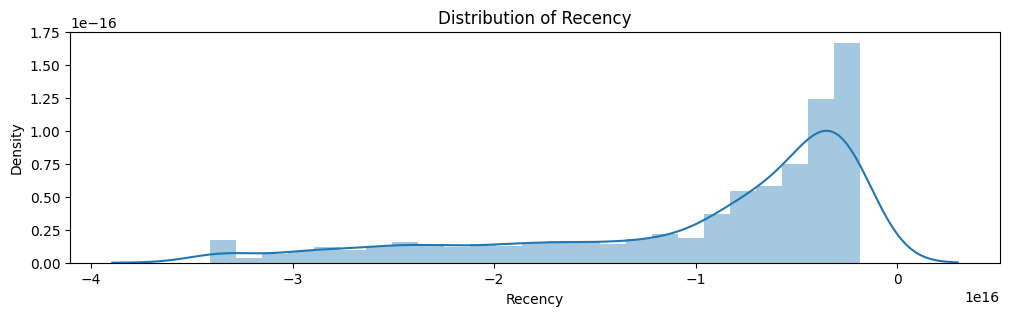

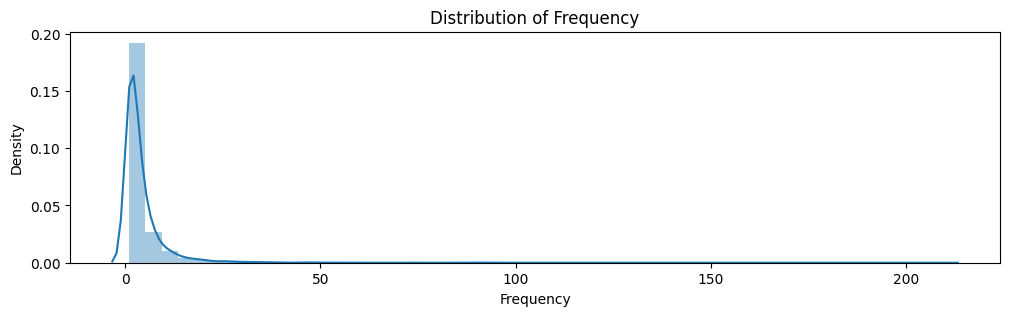

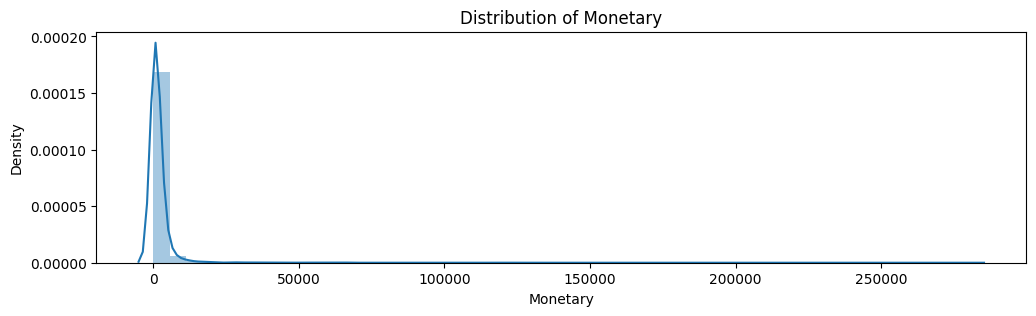

In [ ]:
colnames = ["Recency","Frequency","Monetary"]

for col in colnames:
  fig,ax = plt.subplots(figsize=(12,3))
  sns.distplot(rfm[col])
  ax.set_title("Distribution of %s" % col)
plt.show()

## VI.2. Segment by Customer count

In [ ]:
# Count number of customers per Segment
grp = rfm.groupby("Segment").agg({"CustomerID":"count"})
grp = grp.reset_index()
grp["Percent"] = grp["CustomerID"]/ (grp["CustomerID"].sum())
grp.head()

,Segment,CustomerID,Percent
0,About To Sleep,282,0.065007
1,At Risk,425,0.097971
2,Cannot Lose Them,92,0.021208
3,Champions,831,0.191563
4,Hibernating customers,700,0.161365


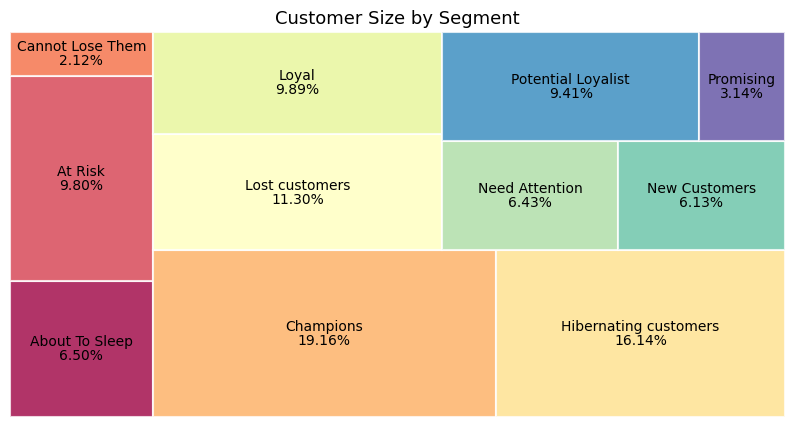

In [ ]:
# Import libraries
!pip install squarify
import squarify

# Define colors
colors = ["#9e0142","#d53e4f","#f46d43","#fdae61","#fee08b","#ffffbf","#e6f598","#abdda4","#66c2a5","#3288bd","#5e4fa2"]

# Draw treemap
fig,ax = plt.subplots(1, figsize=(10,5))
squarify.plot(sizes=grp["CustomerID"],
              label=grp["Segment"],
              value=[f'{x*100:.2f}%' for x in grp["Percent"]],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
              )
plt.title("Customer Size by Segment", fontsize=13)
plt.axis("off")
plt.show()

## VI.3. Segment by Total Sales

In [ ]:
# Calculate Total Sales per Segment
grpM = rfm.groupby("Segment").agg({"Monetary":"sum"})
grpM = grpM.reset_index()
grpM["Percent"] = grpM["Monetary"]/ (grpM["Monetary"].sum())
grpM.head()

,Segment,Monetary,Percent
0,About To Sleep,77774.790,0.008728
1,At Risk,757733.931,0.085030
2,Cannot Lose Them,205324.720,0.023041
3,Champions,5589028.220,0.627177
4,Hibernating customers,288652.092,0.032391


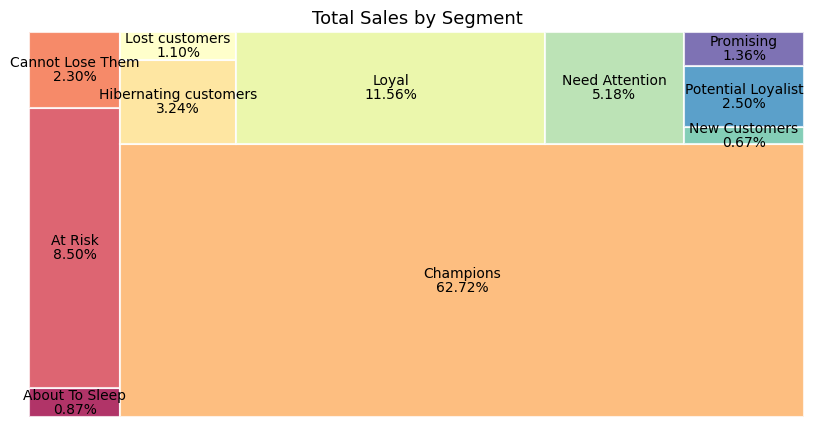

In [ ]:
fig,ax = plt.subplots(1, figsize=(10,5))
squarify.plot(sizes=grpM["Monetary"],
              label=grpM["Segment"],
              value=[f'{x*100:.2f}%' for x in grpM["Percent"]],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
              )
plt.title("Total Sales by Segment", fontsize=13)
plt.axis("off")
plt.show()

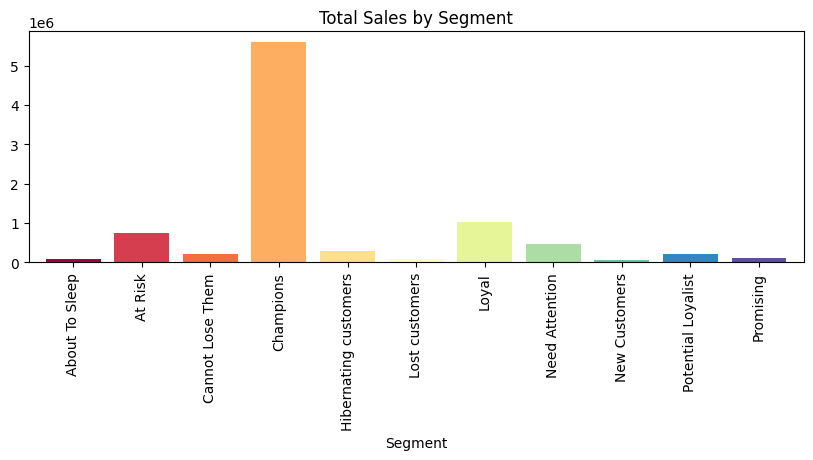

In [ ]:
rfm.groupby('Segment').Monetary.sum().plot.bar(figsize = (10, 3), color=colors, width = 0.8)
plt.title('Total Sales by Segment')
plt.show()

## VI.4. Segment by Frequency

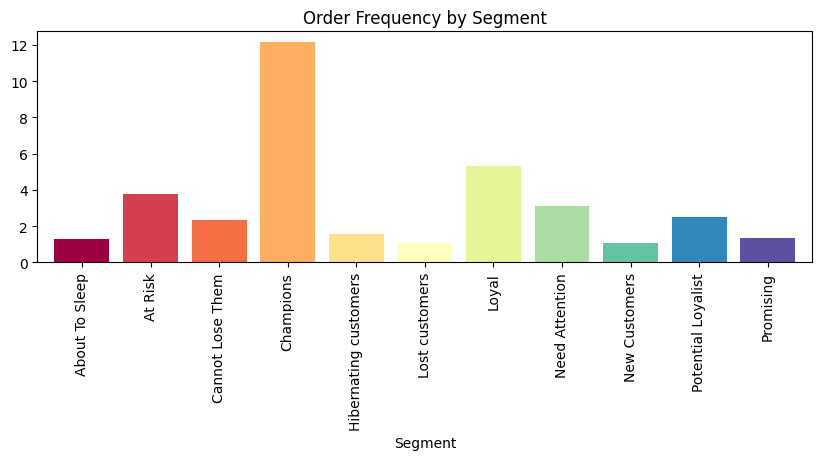

In [ ]:
rfm.groupby('Segment').Frequency.mean().plot.bar(figsize = (10, 3), color=colors, width = 0.8)
plt.title('Order Frequency by Segment')
plt.show()

## VI.5. Segment by Recency

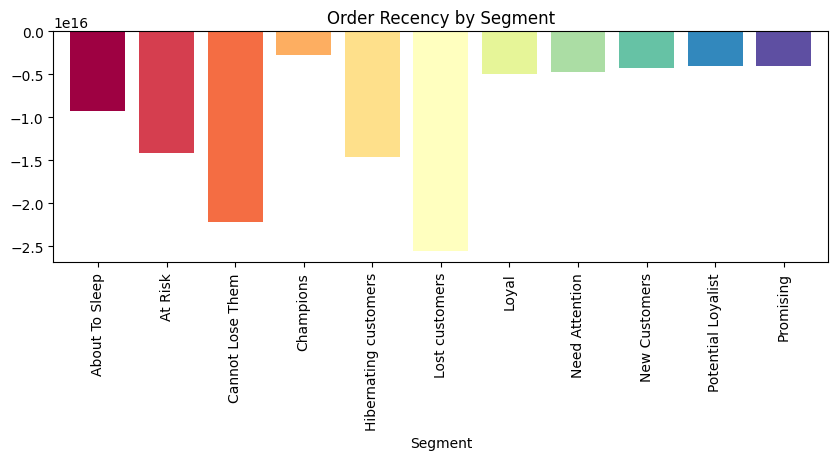

In [ ]:
rfm.groupby('Segment').Recency.mean().plot.bar(figsize = (10, 3), color=colors, width = 0.8)
plt.title('Order Recency by Segment')
plt.show()

# **VII. OTHER CALCULATIONS**

## VII.1. Tactics for Champions segment

In [ ]:
# Find Champion customers
champions = rfm[rfm["Segment"] == "Champions"]
champions = champions[["CustomerID"]]

# Find items purchased by Champions + their unit price
item = champions.merge(ecommerce, on="CustomerID", how="left")
item_price = item[["Description","UnitPrice"]]
item_price = item_price.groupby("Description").agg({"UnitPrice":"mean"})
item_price = item_price.reset_index()

# Find avg price of items purchased by Champions
mean_price = item_price["UnitPrice"].mean()

# List of items purchased by Champions, having price > avg price of all items purchased by Champions
itemlist1 = item_price[item_price["UnitPrice"]>= mean_price]
print(itemlist1)

                           Description  UnitPrice
3          I LOVE LONDON MINI BACKPACK   4.127143
4          I LOVE LONDON MINI RUCKSACK   4.150000
5              NINE DRAWER OFFICE TIDY  14.775000
6           OVAL WALL MIRROR DIAMANTE    9.727778
9               SPACEBOY BABY GIFT SET  16.468987
...                                ...        ...
3664     ZINC HEART LATTICE TRAY OVAL    5.950000
3666        ZINC HERB GARDEN CONTAINER   6.374419
3670  ZINC SWEETHEART WIRE LETTER RACK   3.821190
3674    ZINC TOP  2 DOOR WOODEN SHELF   16.950000
3676       ZINC WIRE KITCHEN ORGANISER   6.714286

[1045 rows x 2 columns]


In [ ]:
# Find how many times an item is purchased by Champions customer
itemlist2 = item[["Description","InvoiceNo"]]
itemlist2 = itemlist2.groupby("Description").agg({"InvoiceNo":"count"}).sort_values("InvoiceNo", ascending=False)
itemlist2 = itemlist2.reset_index()
print(itemlist2)

                             Description  InvoiceNo
0     WHITE HANGING HEART T-LIGHT HOLDER       1075
1                JUMBO BAG RED RETROSPOT       1046
2               REGENCY CAKESTAND 3 TIER        906
3                LUNCH BAG RED RETROSPOT        899
4                          PARTY BUNTING        752
...                                  ...        ...
3673     SET OF 16 VINTAGE IVORY CUTLERY          1
3674             BELL HEART ANTIQUE GOLD          1
3675     SILVER BRACELET W PASTEL FLOWER          1
3676      DUSTY PINK CHRISTMAS TREE 60CM          1
3677               COTE D'AZURE NECKLACE          1

[3678 rows x 2 columns]


In [ ]:
# List of items having price > avg price of items purchased by Champions & most requenctly purchased by Champions
finlist = itemlist2.merge(itemlist1, on="Description", how="inner").sort_values(["InvoiceNo","UnitPrice"], ascending=[False,False])

finlist.head(10)

,Description,InvoiceNo,UnitPrice
0,REGENCY CAKESTAND 3 TIER,906,12.429801
1,PARTY BUNTING,752,4.864654
2,POSTAGE,656,20.756052
3,SET OF 3 CAKE TINS PANTRY DESIGN,615,4.975024
4,SPOTTY BUNTING,580,4.904810
5,ALARM CLOCK BAKELIKE RED,554,3.779061
6,ALARM CLOCK BAKELIKE GREEN,531,3.813766
7,RETROSPOT TEA SET CERAMIC 11 PC,454,5.051938
8,HOT WATER BOTTLE KEEP CALM,444,4.847973
9,JAM MAKING SET WITH JARS,439,4.191253


## VII.2. Tactics for Loyal & Potential Loyalist segments

In [ ]:
# Find customers in Loyal & Potential Loyalist segment
loyal = rfm[(rfm["Segment"] == "Loyal") | (rfm["Segment"] == "Potential Loyalist")]
loyal = loyal[["CustomerID"]]

# Filter invoices of Loyal & Potential Loyalist customers
loyal_iv = loyal.merge(ecommerce, on="CustomerID", how="left")

# Find the invoice value
loyal_value = loyal_iv.groupby("InvoiceNo").sum("LineTotal")

# Find the average invoice value
loyal_avg = loyal_value['LineTotal'].mean()
print(loyal_avg)

377.22777710843366


In [ ]:
# Find the value of all delivered invoices
totalvalue = ecommerce.groupby("InvoiceNo").sum("LineTotal")

# Find the average value of all delivered invoices
avgvalue = totalvalue['LineTotal'].mean()
print(avgvalue)

534.403033266533
